Mean Squared Error: 0.7176532619407113
R2 Score: 0.4523440591012333


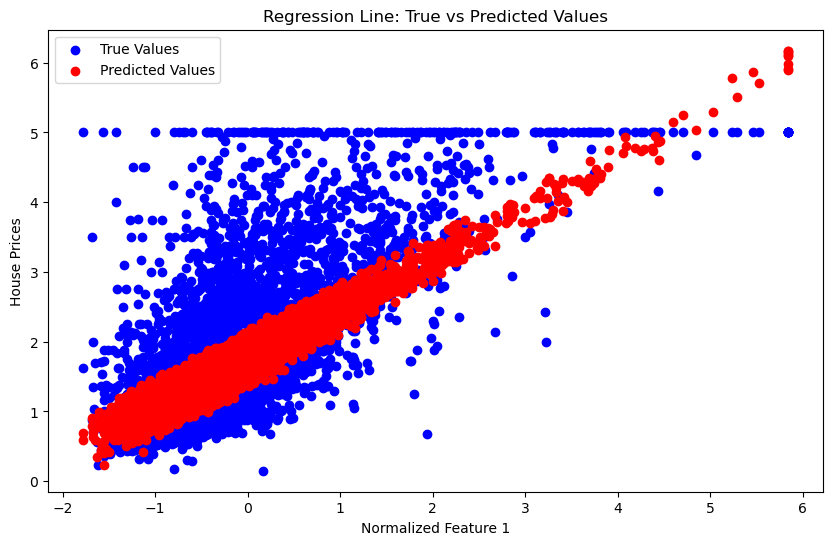

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the California Housing dataset
dataset = fetch_california_housing()

# Create a DataFrame from the dataset
data = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
data['Target'] = dataset.target

# Split data into features and target
X = data.drop(columns=['Target'])
y = data['Target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression Implementation with Gradient Descent
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def fit(self, X, y):
        # Number of features
        n_samples, n_features = X.shape
        # Initialize weights
        self.weights = np.zeros(n_features)

        for epoch in range(self.epochs):
            # Predicted values
            y_pred = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = -(2 / n_samples) * np.dot(X.T, (y - y_pred))
            db = -(2 / n_samples) * np.sum(y - y_pred)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Instantiate the model
model = LinearRegressionGD(learning_rate=0.01, epochs=100)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Plotting the regression line for a single feature
# For simplicity, consider the first feature
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='True Values')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted Values')
plt.xlabel('Normalized Feature 1')
plt.ylabel('House Prices')
plt.title('Regression Line: True vs Predicted Values')
plt.legend()
plt.show()
